In [1]:
import sys
sys.executable

'C:\\Users\\SEAN\\anaconda3\\envs\\Carbon_Cloud\\python.exe'

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols

In [3]:
# Creating a dataframe
transport_df = pd.read_csv("Transportation_Hash_Dummy_Encoded_Dataset.csv")
transport_df.head()

,make,model,engine_size,cylinders,fuel_consumption_comb,vehicle_class_cluster1,vehicle_class_cluster2,vehicle_class_cluster3,vehicle_class_cluster4,vehicle_class_cluster5,vehicle_class_cluster6,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_E,fuel_type_X,fuel_type_Z,co2_emissions
0,0.009751,0.001490,2.0,4,8.5,0,0,0,0,0,0,0,1,0,0,0,0,1,196
1,0.009751,0.001490,2.4,4,9.6,0,0,0,0,0,0,0,0,0,1,0,0,1,221
2,0.009751,0.001490,1.5,4,5.9,0,0,0,0,0,0,0,0,1,0,0,0,1,136
3,0.009751,0.002167,3.5,6,11.1,0,0,1,0,0,0,0,1,0,0,0,0,1,255
4,0.009751,0.001219,3.5,6,10.6,0,0,1,0,0,0,0,1,0,0,0,0,1,244


In [4]:
transport_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   make                    7384 non-null   float64
 1   model                   7384 non-null   float64
 2   engine_size             7384 non-null   float64
 3   cylinders               7384 non-null   int64  
 4   fuel_consumption_comb   7384 non-null   float64
 5   vehicle_class_cluster1  7384 non-null   int64  
 6   vehicle_class_cluster2  7384 non-null   int64  
 7   vehicle_class_cluster3  7384 non-null   int64  
 8   vehicle_class_cluster4  7384 non-null   int64  
 9   vehicle_class_cluster5  7384 non-null   int64  
 10  vehicle_class_cluster6  7384 non-null   int64  
 11  transmission_AM         7384 non-null   int64  
 12  transmission_AS         7384 non-null   int64  
 13  transmission_AV         7384 non-null   int64  
 14  transmission_M          7384 non-null   

In [5]:
transport_df.columns

Index(['make', 'model', 'engine_size', 'cylinders', 'fuel_consumption_comb',
       'vehicle_class_cluster1', 'vehicle_class_cluster2',
       'vehicle_class_cluster3', 'vehicle_class_cluster4',
       'vehicle_class_cluster5', 'vehicle_class_cluster6', 'transmission_AM',
       'transmission_AS', 'transmission_AV', 'transmission_M', 'fuel_type_E',
       'fuel_type_X', 'fuel_type_Z', 'co2_emissions'],
      dtype='object')

In [6]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(transport_df, test_size=0.2, random_state=42)

In [7]:
# Step 1: Fit the Full Model
#  
# Assuming df is your DataFrame with columns 'numerical_var1', 'numerical_var2', 'C1', 'C2', and 'target_variable'
X_full = train_df[['make', 'model', 'engine_size', 'cylinders', 'fuel_consumption_comb', 'vehicle_class_cluster1', 'vehicle_class_cluster2', 'vehicle_class_cluster3', 'vehicle_class_cluster4', 'vehicle_class_cluster5', 'vehicle_class_cluster6', 'transmission_AM', 'transmission_AS', 'transmission_AV', 'transmission_M', 'fuel_type_E', 'fuel_type_X', 'fuel_type_Z']]
X_full = sm.add_constant(X_full)  # Add constant term for intercept
y = train_df['co2_emissions']
full_model = sm.OLS(y, X_full).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 4.150e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:48:43   Log-Likelihood:                -18079.
No. Observations:                5907   AIC:                         3.620e+04
Df Residuals:                    5888   BIC:                         3.632e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     34.6210      0.600     57.665      0.000      33.444      35.798
make                      14.5166      3.094      4.692      0.000       8.452      20.581
model                    -25.9786     10.291     -2.525      0.012     -46.152      -5.805
engine_size                0.0386      0.154      0.251      0.802      -0.263       0.340
cylinders                  0.6712      0.110      6.125      0.000       0.456       0.886
fuel_consumption_comb     22.4651      0.065    344.139      0.000      22.337      22.593
vehicle_class_cluster1   -20.3045      1.437    -14.134      0.000     -23.121     -17.488
vehicle_class_cluster2     2.1008      0.426      4.936      0.000       1.266       2.935
vehicle_class_cluster3     0.7146      0.201      3.547      0.000       0.320       1.109
vehicle_class_cluster4   -13.6260      0.869    -15.687      0.000     -15.329     -11.923
vehicle_class_cluster5     0.1344      0.296      0.454      0.650      -0.446       0.715
vehicle_class_cluster6     0.3728      0.250      1.494      0.135      -0.116       0.862
transmission_AM           -0.4926      0.297     -1.661      0.097      -1.074       0.089
transmission_AS           -0.0482      0.185     -0.260      0.795      -0.411       0.315
transmission_AV           -1.9365      0.309     -6.266      0.000      -2.542      -1.331
transmission_M            -0.7961      0.244     -3.265      0.001      -1.274      -0.318
fuel_type_E             -142.9149      0.664   -215.206      0.000    -144.217    -141.613
fuel_type_X              -29.7439      0.470    -63.312      0.000     -30.665     -28.823
fuel_type_Z              -29.5977      0.493    -60.072      0.000     -30.564     -28.632
==============================================================================
Omnibus:                     1738.798   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           190091.045
Skew:                          -0.315   Prob(JB):                         0.00
Kurtosis:                      30.784   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# 'make', 'transmission_AM', 'transmission_AS', 'transmission_AV', 'transmission_M'
# Step 2: Fit the Reduced Model
X_reduced = train_df[['model', 'cylinders', 'engine_size', 'fuel_consumption_comb', 'vehicle_class_cluster1', 'vehicle_class_cluster2', 'vehicle_class_cluster3', 'vehicle_class_cluster4', 'vehicle_class_cluster5', 'vehicle_class_cluster6', 'fuel_type_E', 'fuel_type_X', 'fuel_type_Z']]
X_reduced = sm.add_constant(X_reduced)  # Add constant term for intercept
reduced_model = sm.OLS(y, X_reduced).fit()
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.674e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:48:43   Log-Likelihood:                -18118.
No. Observations:                5907   AIC:                         3.626e+04
Df Residuals:                    5893   BIC:                         3.636e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     34.1708      0.565     60.502      0.000      33.064      35.278
model                     -3.6013      9.525     -0.378      0.705     -22.274      15.072
cylinders                  0.6396      0.109      5.869      0.000       0.426       0.853
engine_size                0.0013      0.152      0.008      0.993      -0.297       0.299
fuel_consumption_comb     22.5842      0.062    364.922      0.000      22.463      22.706
vehicle_class_cluster1   -20.1632      1.435    -14.047      0.000     -22.977     -17.349
vehicle_class_cluster2     2.2761      0.422      5.398      0.000       1.450       3.103
vehicle_class_cluster3     0.7073      0.197      3.582      0.000       0.320       1.094
vehicle_class_cluster4   -13.5941      0.857    -15.854      0.000     -15.275     -11.913
vehicle_class_cluster5    -0.0253      0.293     -0.086      0.931      -0.600       0.549
vehicle_class_cluster6     0.5504      0.241      2.285      0.022       0.078       1.022
fuel_type_E             -143.6509      0.653   -220.029      0.000    -144.931    -142.371
fuel_type_X              -30.2263      0.469    -64.506      0.000     -31.145     -29.308
fuel_type_Z              -30.1062      0.491    -61.270      0.000     -31.069     -29.143
==============================================================================
Omnibus:                     1750.882   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           205940.682
Skew:                          -0.295   Prob(JB):                         0.00
Kurtosis:                      31.920   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Step 3: Perform the Test
# For ANOVA
anova_results = sm.stats.anova_lm(reduced_model, full_model)

# Extract F-statistic
f_statistic = anova_results['F'][1]
# Extract p-value
p_value_anova = anova_results['Pr(>F)'][1]

anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,5893.0,159622.853735,0.0,NaN,NaN,NaN
1,5888.0,157500.802613,5.0,2122.051122,15.866125,1.480608e-15


In [10]:
# Step 4: Interpret the Results
alpha = 0.05
if p_value_anova < alpha:
    print("ANOVA: Reject the null hypothesis. Categorical variables are jointly significant.")
else:
    print("ANOVA: Fail to reject the null hypothesis. Categorical variables are not jointly significant.")

ANOVA: Reject the null hypothesis. Categorical variables are jointly significant.


In [11]:
# # Finalized Transportation Model

# # Fit the Final Model
# final_model = train_df[['model', 'cylinders', 'engine_size', 'fuel_consumption_comb', 'vehicle_class_cluster1', 'vehicle_class_cluster2', 'vehicle_class_cluster3', 'vehicle_class_cluster4', 'vehicle_class_cluster5', 'vehicle_class_cluster6', 'fuel_type_E', 'fuel_type_X', 'fuel_type_Z']]
# final_model = sm.add_constant(final_model)
# final_model = sm.OLS(y, final_model).fit()
# final_model.summary()

formula = f'co2_emissions ~ model + cylinders + engine_size + fuel_consumption_comb + vehicle_class_cluster1 + vehicle_class_cluster2 + vehicle_class_cluster3 + vehicle_class_cluster4 + vehicle_class_cluster5 + vehicle_class_cluster6 + fuel_type_E + fuel_type_X + fuel_type_Z'
# Fit the model using the formula
final_model = ols(formula, data=train_df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 5.674e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:48:43   Log-Likelihood:                -18118.
No. Observations:                5907   AIC:                         3.626e+04
Df Residuals:                    5893   BIC:                         3.636e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 34.1708      0.565     60.502      0.000      33.064      35.278
model                     -3.6013      9.525     -0.378      0.705     -22.274      15.072
cylinders                  0.6396      0.109      5.869      0.000       0.426       0.853
engine_size                0.0013      0.152      0.008      0.993      -0.297       0.299
fuel_consumption_comb     22.5842      0.062    364.922      0.000      22.463      22.706
vehicle_class_cluster1   -20.1632      1.435    -14.047      0.000     -22.977     -17.349
vehicle_class_cluster2     2.2761      0.422      5.398      0.000       1.450       3.103
vehicle_class_cluster3     0.7073      0.197      3.582      0.000       0.320       1.094
vehicle_class_cluster4   -13.5941      0.857    -15.854      0.000     -15.275     -11.913
vehicle_class_cluster5    -0.0253      0.293     -0.086      0.931      -0.600       0.549
vehicle_class_cluster6     0.5504      0.241      2.285      0.022       0.078       1.022
fuel_type_E             -143.6509      0.653   -220.029      0.000    -144.931    -142.371
fuel_type_X              -30.2263      0.469    -64.506      0.000     -31.145     -29.308
fuel_type_Z              -30.1062      0.491    -61.270      0.000     -31.069     -29.143
==============================================================================
Omnibus:                     1750.882   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           205940.682
Skew:                          -0.295   Prob(JB):                         0.00
Kurtosis:                      31.920   Cond. No.                     1.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# y_test = test_df['co2_emissions']
# test_df.drop(['make', 'transmission_AM', 'transmission_AS', 'transmission_AV', 'transmission_M', 'co2_emissions'], axis=1, inplace=True)

In [13]:
# test_df.columns

In [14]:
# Testing the Model.

from sklearn.metrics import mean_squared_error, r2_score

# Use the fitted model to make predictions on the testing data
predictions = final_model.predict(test_df)

# Calculate evaluation metrics
mse = mean_squared_error(test_df['co2_emissions'], predictions)
r2 = r2_score(test_df['co2_emissions'], predictions)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 27.53246621551781
R-squared (R2): 0.9920801431857493


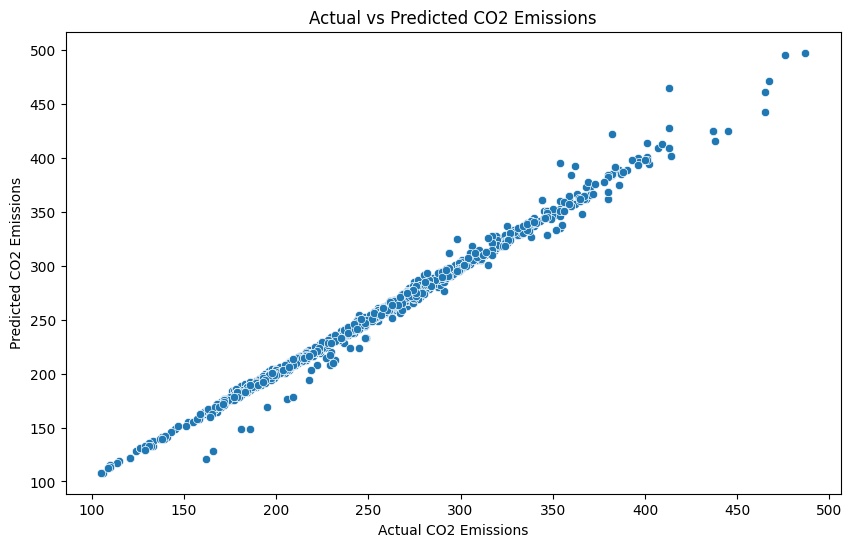

In [15]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_df['co2_emissions'], y=predictions)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

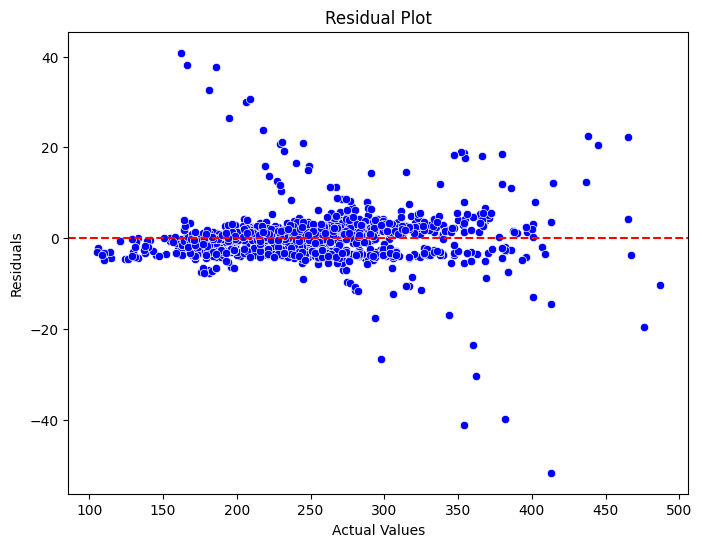

In [16]:
# Calculate residuals
residuals = test_df['co2_emissions'] - predictions

# Create the residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_df['co2_emissions'], y=residuals, color='blue')
# Adding a horizontal line at y=0
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [17]:
import joblib

# Save the final model
joblib.dump(final_model, 'Transportation_Model.pkl')

['Transportation_Model.pkl']